Multi variate Gaussian Mixture Model - EM ALGORITHM

question 1 part b

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
import scipy

In [15]:
def gaussian(X, mu, cov):
    n = X.shape[1]
    diff = (X - mu).T
    cov = cov
    cov = np.array(cov,dtype= np.float64)
    cov_det = np.linalg.det(cov)
   
    #if cov_det == 0:
    ki = len(cov)
    identity_matrix = np.eye(ki)
    lam = 1e-65
    #Adding lamda I to avoid errors due to computaion
    cov = cov + lam*identity_matrix
    cov_det = np.linalg.det(cov)
    
    if np.linalg.det(cov) == 0:
        exponent_term = -0.5 * np.dot(np.dot(diff.T, np.linalg.pinv(cov +1e-1*np.eye(cov.shape[0]) )), diff)
    else: 
        exponent_term = -0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff) 
    normalization_term = 1 / ((2 * np.pi) ** (n / 2) * (cov_det+lam) ** 0.5)
    gaussian_pdf = normalization_term * np.exp(exponent_term ) 
    
    return np.diagonal(gaussian_pdf).reshape(-1, 1)

In [16]:
def random_initialize_clusters(X, n_clusters):
    clusters = []
    for i in range(n_clusters):
        clusters.append({'pi_k': 1.0 / n_clusters,'mu_k': [np.random.rand() for i in range(0,len(X[0]))],'cov_k': np.identity(X.shape[1], dtype=np.float64)})
    return clusters

In [17]:
def expectation(X, clusters):
    global lamda_nk, totals
    N = X.shape[0]
    K = len(clusters)
    totals = np.zeros((N, 1), dtype=np.float64)
    lamda_nk = np.zeros((N, K), dtype=np.float64)
    for k, cluster in enumerate(clusters):
        pi_k = cluster['pi_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
        lamda_nk[:, k] = (pi_k * gaussian(X, mu_k, cov_k)).ravel()
    totals = np.sum(lamda_nk, 1)
    lamda_nk /= np.expand_dims(totals, 1)

In [18]:
def maximization(X, clusters):
    global lamda_nk
    numb = float(X.shape[0])
    for k, cluster in enumerate(clusters):
        lamda_k = np.expand_dims(lamda_nk[:, k], 1)
        summation = np.sum(lamda_k, axis=0)
        pi_k = summation / numb
        mu_k = np.sum(lamda_k * X, axis=0) / summation
        cov_k = (lamda_k* (X - mu_k)).T @ (X - mu_k) / summation
        cluster['pi_k'] = pi_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k

In [19]:
def loglikelihood1(X, clusters):
    global lamda_nk, totals
    loglikelihoods = np.log(totals+1e-10)
    return np.sum(loglikelihoods)

In [20]:
def train_gmm(X, n_clusters, n_epochs):
    clusters = random_initialize_clusters(X, n_clusters)
    loglikelihoods = np.zeros((n_epochs, ))
    for i in range(n_epochs):
        expectation(X, clusters)
        maximization(X, clusters)
        loglikelihood= loglikelihood1(X, clusters)
        loglikelihoods[i] = loglikelihood
        print('Epoch/Iteration:',i+1,'LogLikelihood:',loglikelihood)
        
    
    return clusters, loglikelihoods

In [21]:
import csv 

INput the data

In [22]:
data = [np.zeros(50) for i in range(400)]
i=0
with open('E:\ACADS STUFF\Semester 6\prml\Assignment 2\A2Q1.csv') as file:    
    csv_reader = csv.reader(file)    
    for row in csv_reader:   
        data[i] = row
        i+=1

data = np.array(data, dtype=np.float64)

NOTE: an observation in this algorithm is that it heavyily at times depends on the initialisation of the parameters. AT times, it throws error such as singluar matrix and unable to calculate gaussian pdf. Such cases has been handled by adding a small epsilon times identity matrix to mimise such errors

In [26]:
train_gmm(data,4,100)

Epoch/Iteration: 1 LogLikelihood: -9210.340371976174
Epoch/Iteration: 2 LogLikelihood: -3107.202052864576
Epoch/Iteration: 3 LogLikelihood: -274.445519557397


C:\Users\aniru\AppData\Local\Temp\ipykernel_19268\3061201059.py:20: RuntimeWarning: overflow encountered in exp
  gaussian_pdf = normalization_term * np.exp(exponent_term )


Epoch/Iteration: 4 LogLikelihood: 1346.9112636027799
Epoch/Iteration: 5 LogLikelihood: 1316.0020538149427
Epoch/Iteration: 6 LogLikelihood: 1288.6371716043966
Epoch/Iteration: 7 LogLikelihood: 1290.9091228844638
Epoch/Iteration: 8 LogLikelihood: 1324.2169524875994
Epoch/Iteration: 9 LogLikelihood: 1284.979004481229
Epoch/Iteration: 10 LogLikelihood: 1285.8247880537251
Epoch/Iteration: 11 LogLikelihood: 1289.1883839427937
Epoch/Iteration: 12 LogLikelihood: 1287.1282456172107
Epoch/Iteration: 13 LogLikelihood: 1287.290004046326
Epoch/Iteration: 14 LogLikelihood: 1286.9525536950148
Epoch/Iteration: 15 LogLikelihood: 1286.8652612521846
Epoch/Iteration: 16 LogLikelihood: 1286.8393617259633
Epoch/Iteration: 17 LogLikelihood: 1286.9524261476786
Epoch/Iteration: 18 LogLikelihood: 1287.6701139920979
Epoch/Iteration: 19 LogLikelihood: 1327.4294580857345
Epoch/Iteration: 20 LogLikelihood: 1287.7323818029392
Epoch/Iteration: 21 LogLikelihood: 1287.3378373068135
Epoch/Iteration: 22 LogLikelihood: 1

([{'pi_k': array([0.19770053]),
   'mu_k': array([0.1138085 , 0.06322694, 0.06322695, 0.05058155, 0.05058155,
          0.1390993 , 0.02529078, 0.13909928, 0.        , 0.02529078,
          0.16424106, 0.1138085 , 0.63252637, 0.91148343, 0.93677323,
          0.97470922, 0.81031917, 0.70915843, 1.        , 0.        ,
          0.02529078, 0.1272035 , 0.55680289, 0.39261667, 0.86090078,
          0.48113324, 0.4682852 , 0.15174466, 0.18974297, 0.13909927,
          0.10116315, 0.12645388, 0.56944716, 0.89883706, 0.87354689,
          0.430552  , 0.44299443, 0.55680524, 0.59473908, 0.16438994,
          0.10116311, 0.12645156, 0.16439005, 0.13909698, 0.12645384,
          0.10116311, 0.21497131, 0.15208368, 0.16439006, 0.07587238]),
   'cov_k': array([[ 0.10085612,  0.00544963,  0.00544962, ..., -0.00466303,
           -0.01870899, -0.00863492],
          [ 0.00544963,  0.0592293 , -0.00399765, ...,  0.01567499,
           -0.01039388, -0.00479718],
          [ 0.00544962, -0.00399765, 

Average over 100 runs

In [27]:
n_clusters = 4
n_epochs = 100
clusters, loglikelihoods = train_gmm(data, n_clusters, n_epochs)
lf = loglikelihoods
for i in range(99):
    a,L = train_gmm(data,4,100)
    for q in range(len(L)):
        if np.isnan(L[q]):
            L[q] = lf[q] / i
    lf = [x+y for x,y in zip(lf,L)]




Epoch/Iteration: 1 LogLikelihood: -9210.340371976163
Epoch/Iteration: 2 LogLikelihood: -3170.5694493529604
Epoch/Iteration: 3 LogLikelihood: -603.3972368452834
Epoch/Iteration: 4 LogLikelihood: 375.5399198534363
Epoch/Iteration: 5 LogLikelihood: 334.4729721491625
Epoch/Iteration: 6 LogLikelihood: 320.5985895400915
Epoch/Iteration: 7 LogLikelihood: 315.84366008142126
Epoch/Iteration: 8 LogLikelihood: 315.78385429473906
Epoch/Iteration: 9 LogLikelihood: 319.29518295512264
Epoch/Iteration: 10 LogLikelihood: 316.5154942010664
Epoch/Iteration: 11 LogLikelihood: 316.508545019165
Epoch/Iteration: 12 LogLikelihood: 316.6298316507577
Epoch/Iteration: 13 LogLikelihood: 316.68034774436614
Epoch/Iteration: 14 LogLikelihood: 316.7025176508616
Epoch/Iteration: 15 LogLikelihood: 316.7124314381477
Epoch/Iteration: 16 LogLikelihood: 316.71690606145137
Epoch/Iteration: 17 LogLikelihood: 316.7189372011991
Epoch/Iteration: 18 LogLikelihood: 316.7198626911193
Epoch/Iteration: 19 LogLikelihood: 316.72028549

C:\Users\aniru\AppData\Local\Temp\ipykernel_19268\3061201059.py:20: RuntimeWarning: overflow encountered in exp
  gaussian_pdf = normalization_term * np.exp(exponent_term )
C:\Users\aniru\AppData\Local\Temp\ipykernel_19268\3061201059.py:20: RuntimeWarning: overflow encountered in multiply
  gaussian_pdf = normalization_term * np.exp(exponent_term )


Epoch/Iteration: 8 LogLikelihood: 1390.1999147422373
Epoch/Iteration: 9 LogLikelihood: 1429.931685670219
Epoch/Iteration: 10 LogLikelihood: 1430.0408254833123
Epoch/Iteration: 11 LogLikelihood: 1391.0982686638833
Epoch/Iteration: 12 LogLikelihood: 1390.8139408551601
Epoch/Iteration: 13 LogLikelihood: 1391.1185984167087
Epoch/Iteration: 14 LogLikelihood: 1430.7304858324126
Epoch/Iteration: 15 LogLikelihood: 1390.7805340586945
Epoch/Iteration: 16 LogLikelihood: 1390.7463338282864
Epoch/Iteration: 17 LogLikelihood: 1390.8398515754125
Epoch/Iteration: 18 LogLikelihood: 1390.7964577541798
Epoch/Iteration: 19 LogLikelihood: 1390.8180055448524
Epoch/Iteration: 20 LogLikelihood: 1429.8116347472983
Epoch/Iteration: 21 LogLikelihood: 1390.8339782358426
Epoch/Iteration: 22 LogLikelihood: 1391.1119324333965
Epoch/Iteration: 23 LogLikelihood: 1391.3973778308857
Epoch/Iteration: 24 LogLikelihood: 1392.7008637507047
Epoch/Iteration: 25 LogLikelihood: 1430.3928230563545
Epoch/Iteration: 26 LogLikeliho

C:\Users\aniru\AppData\Local\Temp\ipykernel_19268\3035942335.py:13: RuntimeWarning: invalid value encountered in divide
  lamda_nk /= np.expand_dims(totals, 1)


Epoch/Iteration: 14 LogLikelihood: nan
Epoch/Iteration: 15 LogLikelihood: nan
Epoch/Iteration: 16 LogLikelihood: nan
Epoch/Iteration: 17 LogLikelihood: nan
Epoch/Iteration: 18 LogLikelihood: nan
Epoch/Iteration: 19 LogLikelihood: nan
Epoch/Iteration: 20 LogLikelihood: nan
Epoch/Iteration: 21 LogLikelihood: nan
Epoch/Iteration: 22 LogLikelihood: nan
Epoch/Iteration: 23 LogLikelihood: nan
Epoch/Iteration: 24 LogLikelihood: nan
Epoch/Iteration: 25 LogLikelihood: nan
Epoch/Iteration: 26 LogLikelihood: nan
Epoch/Iteration: 27 LogLikelihood: nan
Epoch/Iteration: 28 LogLikelihood: nan
Epoch/Iteration: 29 LogLikelihood: nan
Epoch/Iteration: 30 LogLikelihood: nan
Epoch/Iteration: 31 LogLikelihood: nan
Epoch/Iteration: 32 LogLikelihood: nan
Epoch/Iteration: 33 LogLikelihood: nan
Epoch/Iteration: 34 LogLikelihood: nan
Epoch/Iteration: 35 LogLikelihood: nan
Epoch/Iteration: 36 LogLikelihood: nan
Epoch/Iteration: 37 LogLikelihood: nan
Epoch/Iteration: 38 LogLikelihood: nan
Epoch/Iteration: 39 LogLi

In [28]:
for i in range(len(lf)):
    lf[i] = lf[i]/10

In [37]:
for i in range(len(lf)):
    if np.isinf(lf[i]):
        lf[i] = (lf[i-1] + lf[i+1])/2

In [30]:
for i, value in enumerate(lf):
    try:
  
        lf[i] = lf[i]
    except ValueError:
        lf[i] = (lf[i-1] + lf[i+1])/2

In [38]:
lf

[-9210.340371976166,
 -3178.823979406144,
 -521.3057053879156,
 707.2384628628256,
 1086.2770544228647,
 571.132781936537,
 772.7965289867803,
 974.4602760370237,
 985.9535131020045,
 974.7867852044781,
 965.3131341153627,
 962.3876451581491,
 962.5074208594908,
 974.8936368008715,
 963.1040038055729,
 960.9109174630582,
 965.1918789624981,
 958.1600405545314,
 968.1121976999273,
 977.7609105641975,
 962.3844159285238,
 961.1963852183169,
 961.3113790009763,
 973.4224324562531,
 982.0677674843773,
 986.0159727981858,
 958.1251934279829,
 963.7250065756641,
 960.659011718884,
 963.8123678837453,
 976.5700442798864,
 961.9065274380215,
 962.1066855272948,
 969.9107111038745,
 960.8722648187843,
 974.7904049051722,
 968.3978530821826,
 961.0793089503474,
 968.8303467281308,
 965.5320385518802,
 962.6124417047828,
 974.7490089061026,
 968.4595617917018,
 984.8345178638771,
 962.0314463835915,
 970.5124240309317,
 972.8854601011296,
 963.0177656118556,
 961.533389162714,
 979.8074154273661,

PLot the log likelihood vs iteration averaged over 100 runs

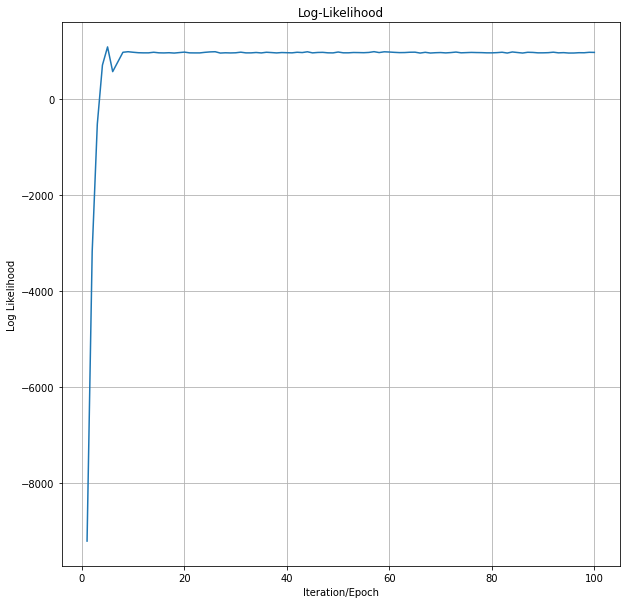

In [39]:
plt.figure(figsize=(10, 10))
plt.title('Log-Likelihood')
plt.plot(np.arange(1, n_epochs + 1), lf)
plt.xlabel('Iteration/Epoch')
plt.ylabel('Log Likelihood')
plt.grid(True)
plt.show()

In [40]:
lamda_nk

array([[4.61382786e-007, 1.67743625e-002, 6.76965882e-011,
        9.83225176e-001],
       [9.33192347e-014, 5.87100630e-018, 6.67978061e-021,
        1.00000000e+000],
       [4.18131000e-018, 4.62531714e-067, 1.00000000e+000,
        3.73660403e-054],
       ...,
       [4.29564216e-031, 1.03856078e-115, 0.00000000e+000,
        1.00000000e+000],
       [6.92187091e-025, 6.95857077e-025, 1.00000000e+000,
        0.00000000e+000],
       [1.00000000e+000, 5.67001671e-074, 1.30317496e-099,
        2.62359599e-067]])

Converting soft clustering into hard clustering, ie classifying all the data points into clusters for comparison with other methods

In [41]:
z = [-1 for i in range(len(data))]

In [42]:
for i in range(len(data)):
    ind = np.argmax(lamda_nk[i])
    z[i] = ind

In [43]:
z

[3,
 3,
 2,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 0,
 1,
 3,
 2,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 1,
 0,
 3,
 2,
 1,
 2,
 1,
 3,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 0,
 3,
 0,
 1,
 1,
 1,
 0,
 2,
 3,
 3,
 0,
 1,
 1,
 3,
 3,
 2,
 3,
 0,
 2,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 2,
 0,
 3,
 3,
 2,
 3,
 1,
 2,
 3,
 2,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 3,
 0,
 3,
 2,
 2,
 0,
 0,
 2,
 3,
 0,
 1,
 3,
 0,
 0,
 0,
 1,
 0,
 3,
 1,
 3,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 3,
 0,
 2,
 2,
 2,
 1,
 3,
 1,
 0,
 2,
 1,
 1,
 3,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 0,
 3,
 3,
 2,
 0,
 3,
 2,
 1,
 0,
 0,
 3,
 2,
 3,
 3,
 1,
 2,
 1,
 0,
 0,
 1,
 3,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 3,
 0,
 2,
 2,
 0,
 0,
 3,
 1,
 3,
 0,
 3,
 1,
 3,
 0,
 0,
 3,
 2,
 0,
 2,
 0,
 2,
 3,
 0,
 3,
 3,
 0,
 3,
 0,
 0,
 1,
 3,
 3,
 3,
 2,
 0,
 1,
 3,
 2,
 0,
 1,
 0,
 0,
 3,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 0,
 2,
 0,
 3,


In [44]:
def means_calc(data,z):
    s=[[0 for i in range(0,50)] for i in range(0,4)]
    num = [0 for i in range(0,4)]
    for i in range(len(z)):
        cluster = z[i]
        num[cluster]+=1
        #print(data[i])
        s[cluster] = [x+y for x,y in zip(s[cluster],data[i])]
    for i in range(len(s)):
        for j in range(len(s[i])):
            s[i][j] = s[i][j] / num[i]
    return s
        

In [45]:
m = means_calc(data,z)

In [46]:
def score_calc(data,z,means):
    score = 0
    for i in range(len(data)):
        score += np.linalg.norm(data[i] - means[z[i]])
    return score

Calculate the objective which is the sum of distance of each point from its cluster center

In [48]:
score_calc(data,z,m)

926.1802812329421